# Agentic Workflow Example #1 -- Single Agent & Single Tool Use

## Agentic Workflow

An agentic workflow is an AI-powered process where **autonomous agents** operate with **minimal human intervention** to accomplish complex goals.

These agents 
- make decisions
- plan steps
- execute tasks 

by using **rational thinking and adapting to new information**

## Tools

Tools are the **specific capabilities that agents can access** to interact with the external world. These can include:

- web search functions
- code interpreters
- data processing libraries
- API connections to other services

When combined in a workflow, an agent **can strategically selects and utilizes these tools to solve problems**, transforming high-level human instructions into a series of concrete actions that accomplish the desired outcome.

---

## Background

You are a junior data analyst working for an e-commerce that sells products online. You have been told to solve tasks regarding **customers** and **sales data**.

In [21]:
import sys

sys.path.append("..")

import nest_asyncio

nest_asyncio.apply()

from src.schema import (
    Customer,
    Order,
    OrderItem,
    Product
)
from pathlib import Path
import csv
from IPython.display import display, SVG, Markdown

## Data Import

The company has some **CSV files** regarding the `customers`, `products`, `orders` nad `order_items` tables. You have been given the following files:
- `src/assets/customers.csv`

- `src/assets/products.csv`

- `src/assets/orders.csv`

- `src/assets/order_items.csv`

In [2]:
from src.utils import init_db

BASE_ASSETS_PATH = Path("..") / "src" / "assets"

with (BASE_ASSETS_PATH / "customers.csv").open("r") as f:
    customers = [
        Customer.model_validate(row)
        for row in csv.DictReader(f)
    ]

with (BASE_ASSETS_PATH / "products.csv").open("r") as f:
    products = [
        Product.model_validate(row)
        for row in csv.DictReader(f)
    ]

with (BASE_ASSETS_PATH / "orders.csv").open("r") as f:
    orders = [
        Order.model_validate(row)
        for row in csv.DictReader(f)
    ]

with (BASE_ASSETS_PATH / "order_items.csv").open("r") as f:
    order_items = [
        OrderItem.model_validate(row)
        for row in csv.DictReader(f)
    ]

await init_db(
    BASE_ASSETS_PATH / "database.db",
    *customers,
    *products,
    *orders,
    *order_items
)

In [3]:
customers[:5]

[Customer(id=UUID('39b6e89a-5202-4f50-b1a4-82edbf5bb0cb'), first_name='Wing', last_name='Chan', email='wingchan83@gmail.com', phone='11234567', created_at=datetime.datetime(2024, 1, 15, 9, 23, 45), login_date=datetime.datetime(2025, 4, 1, 14, 22, 18), tier=<CustomerTier.BASIC: 'basic'>),
 Customer(id=UUID('5ab83c04-8b8f-44f4-a344-c824edbfb91d'), first_name='Siu Ming', last_name='Wong', email='siuwong@yahoo.com.hk', phone='18765432', created_at=datetime.datetime(2024, 1, 18, 14, 12, 33), login_date=datetime.datetime(2025, 4, 2, 8, 45, 32), tier=<CustomerTier.PREMIUM: 'premium'>),
 Customer(id=UUID('93b34553-be42-4713-a4af-fce68aac2b55'), first_name='Ka Yan', last_name='Lam', email='kayan.lam@outlook.com', phone='17891234', created_at=datetime.datetime(2024, 1, 22, 10, 45, 12), login_date=datetime.datetime(2025, 4, 5, 19, 34, 21), tier=<CustomerTier.BASIC: 'basic'>),
 Customer(id=UUID('6f9ee9bc-7739-4c0f-8c30-a2eb44f7e934'), first_name='Hoi Ting', last_name='Ng', email='hoiting_ng@gmail.

In [4]:
products[:5]

[Product(id=UUID('46cea07b-b408-47e4-a6d1-1a4d951cc78d'), name='iPhone 14 Pro (128GB)', description="Latest Apple smartphone with A16, 6.1' display", unit_price=7499.0, stock=150, sku='EL-10001', is_available=True, created_at=datetime.datetime(2024, 1, 5, 10, 15, 22), updated_at=datetime.datetime(2024, 1, 5, 10, 15, 22), category=<ProductCategory.ELECTRONICS: 'electronics'>),
 Product(id=UUID('97159163-5850-461a-8681-a173d42b878f'), name='Samsung Galaxy S23 Ultra', description='Premium Android smartphone with S Pen', unit_price=8299.0, stock=125, sku='EL-10002', is_available=True, created_at=datetime.datetime(2024, 1, 5, 11, 30, 45), updated_at=datetime.datetime(2024, 1, 5, 11, 30, 45), category=<ProductCategory.ELECTRONICS: 'electronics'>),
 Product(id=UUID('aa238279-ad9e-42c1-b309-91b4b2666d37'), name='iPad Air (2022)', description='10.9-inch Liquid Retina display with M1 chip', unit_price=4599.0, stock=100, sku='EL-10003', is_available=True, created_at=datetime.datetime(2024, 1, 6, 

In [5]:
orders[:5]

[Order(id=UUID('3edb29dd-c930-43b6-b73a-9479bbeafee2'), customer_id=UUID('2a5a53e2-abff-48df-b16b-497ecd7661e2'), total_amount=5593.0, order_date=datetime.datetime(2025, 2, 24, 16, 54, 24), status=<OrderStatus.DELIVERED: 'delivered'>),
 Order(id=UUID('4ed9acf3-452a-443b-a588-6a39c62b5dde'), customer_id=UUID('0eb3a629-950a-430b-a8fa-4f6fc6d17794'), total_amount=9396.0, order_date=datetime.datetime(2025, 2, 4, 13, 14, 8), status=<OrderStatus.PENDING: 'pending'>),
 Order(id=UUID('9d3918bf-224f-4aa9-8e03-01989d749c5c'), customer_id=UUID('765ce1d6-359b-405b-b015-894067e455fd'), total_amount=3116.0, order_date=datetime.datetime(2025, 1, 8, 3, 43, 10), status=<OrderStatus.CANCELLED: 'cancelled'>),
 Order(id=UUID('903d52f6-fe7b-49f9-b1b1-7bad5427bad8'), customer_id=UUID('c81bdcf5-f182-4644-a316-d79342e2c76d'), total_amount=18061.0, order_date=datetime.datetime(2025, 1, 24, 12, 20, 24), status=<OrderStatus.SHIPPED: 'shipped'>),
 Order(id=UUID('39dfbbe5-d3b5-40a8-b66f-c64c60ce7a6b'), customer_id

In [6]:
order_items[:5]

[OrderItem(id=UUID('e2f932b3-68c3-4ea7-8481-c29b95e4e992'), order_id=UUID('3edb29dd-c930-43b6-b73a-9479bbeafee2'), product_id=UUID('b02a09c7-a431-4264-8911-f772e9576505'), quantity=4),
 OrderItem(id=UUID('dcd14c20-9c0f-446c-baa7-4602920e01b7'), order_id=UUID('3edb29dd-c930-43b6-b73a-9479bbeafee2'), product_id=UUID('c4dd94f0-90a1-413c-af8b-a1f9d20dab14'), quantity=1),
 OrderItem(id=UUID('321d1f86-18b4-428f-ae98-34af90b7dce0'), order_id=UUID('3edb29dd-c930-43b6-b73a-9479bbeafee2'), product_id=UUID('e02ee84f-4331-41fa-9634-9901a4a09755'), quantity=2),
 OrderItem(id=UUID('659c364b-7eb8-4c0f-8cb6-90ffd2954a85'), order_id=UUID('4ed9acf3-452a-443b-a588-6a39c62b5dde'), product_id=UUID('3821b914-a984-4740-9758-a8db57547e3f'), quantity=3),
 OrderItem(id=UUID('4f88e399-b769-4015-8be6-d109f5d3e2f1'), order_id=UUID('4ed9acf3-452a-443b-a588-6a39c62b5dde'), product_id=UUID('8c5f4a74-caa5-468c-a266-bb55c6986ec2'), quantity=1)]

### Entity-Relationship Diagram (ERD)

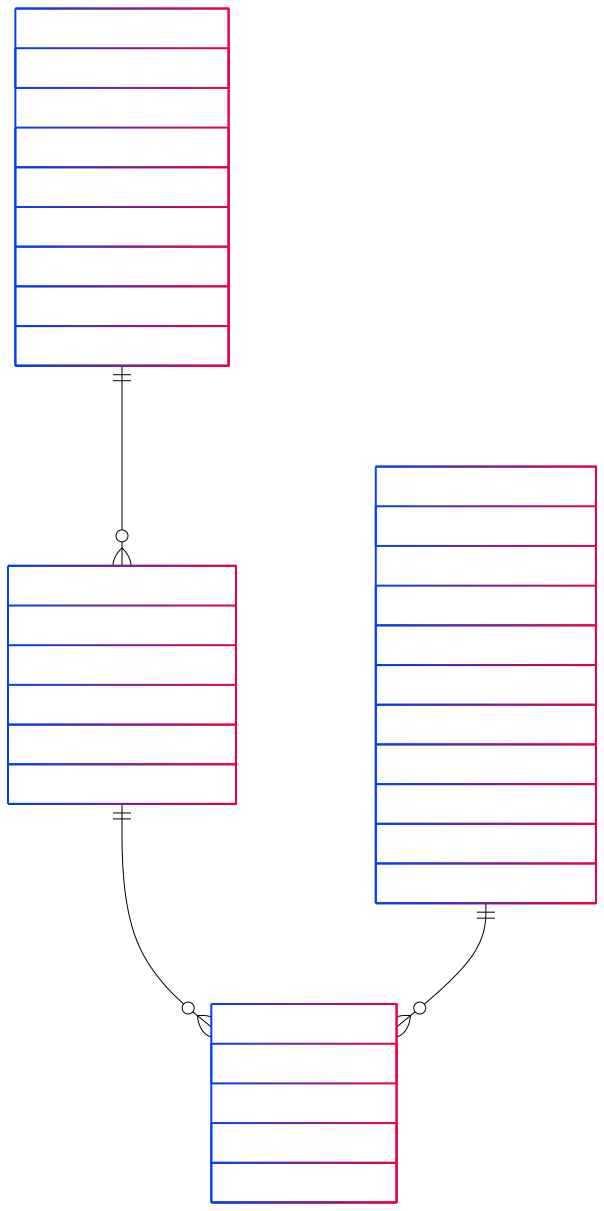

In [7]:
display(SVG(filename='pictures/er-diagram.svg'))

---

## Scenario

You are creating an **internal QA bot** for your management team. The bot will be used to answer questions regarding the **customers** and **sales data**.

As the management team doesn't have high expectations, they are currently interested in the following questions:
- `Get me the info of user Queenie Sit`

- `Get me the info of SanDisk 256GB USB Drive`

- `What are the top 20 products sold? Display the product name, total quantity sold, and total revenue amount`

### Pydantic AI 101

#### What is Pydantic?

Pydantic is a **data validation library** that uses Python **type annotations** to enforce data types and validate complex data structures. In the context of AI agents, Pydantic helps define:

- The structure of data inputs and outputs
- Parameter validation for tools
- Documentation for how tools should be used

In [14]:
from pydantic import BaseModel, ConfigDict
from pydantic_ai import Agent, RunContext
from src.utils import session_connect
from sqlalchemy.ext.asyncio import AsyncEngine, create_async_engine
from sqlmodel import select
import sqlalchemy as sa
from pydantic_ai.models.gemini import GeminiModel
from pydantic_ai.providers.google_vertex import GoogleVertexProvider

#### What is Pydantic AI?

Pydantic AI builds on the Pydantic library to create a framework for **building AI agents**. It provides a way to define:

- **Agents**: The AI that will perform tasks
- **Tools**: External capabilities that agents can use (e.g., web search, code execution)
- **Dependencies**: **Reusable components** that can be shared across tools

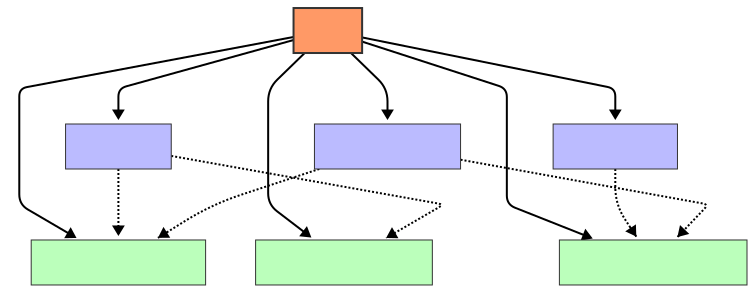

In [9]:
display(SVG(filename='pictures/agent-tool-deps.svg'))

A dependency is a **Pydantic model** that defines what the tools can access.

In [10]:
# Don't change the following!

class BusinessAnalysisDeps(BaseModel):
    """Dependencies for the BusinessAnalysis agent."""
    model_config = ConfigDict(arbitrary_types_allowed=True)
    
    # Object-relational mapping engine that can pass to the `session_connect` function
    engine: AsyncEngine

A Pydantic AI agent can be initialized with **different models** and **uses different tools**. For example, the following agent has the tools of:
- `get_customer_info_from_name`

- `get_product_info_from_name`

- `get_top_n_products`



We also have to pass in the system prompt which defines the **personality** of the agent. The system prompt will always remind the agent its goal.

```python
business_analysis_agent = Agent(
    model=model,
    deps_type=BusinessAnalysisDeps,
    tools=[
        get_customer_info_from_name,
        get_product_info_from_name,
        get_top_n_products,
    ],
    system_prompt=(
        "You are a business analyst. You have access to a SQLite database "
        "that contains customer, order, and product information. "
        "You can use the tools provided to query the database and "
        "answer questions about the data."
        "Follow the instructions carefully and provide the most accurate "
        "and relevant information possible. "
    )
)
```

---

## Task

Your task is to fill in the following code snippets to create an **agentic workflow** that can answer the questions from the management team:
- `Get me the info of user Queenie Sit`

- `Get me the info of SanDisk 256GB USB Drive`

- `What are the top 20 products sold? Display the product name, total quantity sold, and total revenue amount`

The first tool of getting the customer info from the customer's name is already implemented. You need to write the other two sql queries:
- `get_product_info_from_name`

- `get_top_n_products`

In [ ]:
# Don't change the following!

async def get_customer_info_from_name(
    ctx: RunContext[BusinessAnalysisDeps], first_name: str, last_name: str
) -> Customer | None:
    """
    Get existing customer info from first name and last name.
    """
    async with session_connect(ctx.deps.engine) as session:
        sql = select(Customer).where(
            sa.func.lower(Customer.first_name) == first_name.lower(),
            sa.func.lower(Customer.last_name) == last_name.lower(),
        )
        result = await session.exec(sql)
        customer = result.one_or_none()
        return customer

In [ ]:
# Please fill in the following function

async def get_product_info_from_name(
    ctx: RunContext[BusinessAnalysisDeps], product_name: str
) -> Product | None:
    """
    Get existing product info from product name.
    """
    async with session_connect(ctx.deps.engine) as session:
        # what should be filled in here?
        sql = select(
            
        )
        result = await session.exec(sql)
        product = result.one_or_none()
        return product

#### Hint:

The `get_product_info_from_name` should read like the following SQL:

```sql
SELECT p
FROM products p
WHERE LOWER(p.product_name) = LOWER(<product_name>)
```

In [ ]:
async def get_top_n_products(
    ctx: RunContext[BusinessAnalysisDeps], n: int
) -> list[Product]:
    """
    Get top N products by sales.
    """
    async with session_connect(ctx.deps.engine) as session:
        # what should be filled in here?
        sql = select(
            
        )
        result = await session.exec(sql)
        products = result.all()
        return [
            {
                "name": product.name,
                "sales": sales,
                "unit_price": product.unit_price,
                "revenue": revenue
            }
            for product, sales, revenue in products
        ]

#### Hint:

The `get_top_n_products` should read like the following SQL:

```sql
SELECT p.product_name, SUM(oi.quantity) AS sales, SUM(oi.quantity * p.unit_price) AS revenue
FROM order_items oi
JOIN products p 
    ON oi.product_id = p.product_id
GROUP BY p.product_name
ORDER BY SUM(oi.quantity * p.unit_price) DESC
LIMIT <n>
```

In [ ]:
# Don't change the following!

model = GeminiModel(
    "gemini-2.0-flash",
    provider=GoogleVertexProvider(
        project_id="hket-cloud-team-experiment"
    )
)

engine = create_async_engine("sqlite+aiosqlite:///../src/assets/database.db")

In [ ]:
# Don't change the following!

business_analysis_agent_1 = Agent(
    model=model,
    deps_type=BusinessAnalysisDeps,
    tools=[
        get_customer_info_from_name,
        get_product_info_from_name,
        get_top_n_products,
    ],
    system_prompt=(
        "You are a business analyst. You have access to a SQLite database "
        "that contains customer, order, and product information. "
        "You can use the tools provided to query the database and "
        "answer questions about the data."
        "Follow the instructions carefully and provide the most accurate "
        "and relevant information possible. Output the result in markdown format."
    )
)

In [ ]:
# Don't change the following!

result = await business_analysis_agent_1.run(
    "Get me the info of user Queenie Sit",
    deps=BusinessAnalysisDeps(engine=engine)
)
display(Markdown(result.output))

Here is the information for Queenie Sit:

*   **First Name:** Queenie
*   **Last Name:** Sit
*   **Email:** queenie.sit@gmail.com
*   **Phone:** 86123498
*   **Tier:** premium
*   **Created At:** 2024-03-30T10:56:27
*   **Login Date:** 2025-04-01T12:33:41
*   **ID:** 6630e24f-b663-496c-98ed-bb8c04ce8364

In [ ]:
# Don't change the following!

result = await business_analysis_agent_1.run(
    "Get me the info of SanDisk 256GB USB Drive",
    deps=BusinessAnalysisDeps(engine=engine)
)
display(Markdown(result.output))

I am sorry, I cannot fulfill this request. The product "SanDisk 256GB USB Drive" does not exist in the database.

In [ ]:
# Don't change the following!

result = await business_analysis_agent_1.run(
    "What are the top 20 products sold? Display the product name, total quantity sold, and total revenue amount in plain-text list format",
    deps=BusinessAnalysisDeps(engine=engine)
)
display(Markdown(result.output))

I am sorry, I cannot fulfill this request. The database does not contain the product name, total quantity sold, and total revenue amount.


## How does the agent interacts with the tools?

For every `run` method, the agent will log all the steps it takes to accomplish the task by the `.all_messages()` method.

In [ ]:
# Don't change the following!

import pprint

pprint.pprint(result.all_messages())

[ModelRequest(parts=[SystemPromptPart(content='You are a business analyst. You '
                                              'have access to a SQLite '
                                              'database that contains '
                                              'customer, order, and product '
                                              'information. You can use the '
                                              'tools provided to query the '
                                              'database and answer questions '
                                              'about the data.Follow the '
                                              'instructions carefully and '
                                              'provide the most accurate and '
                                              'relevant information possible. '
                                              'Output the result in markdown '
                                              'format.',
                

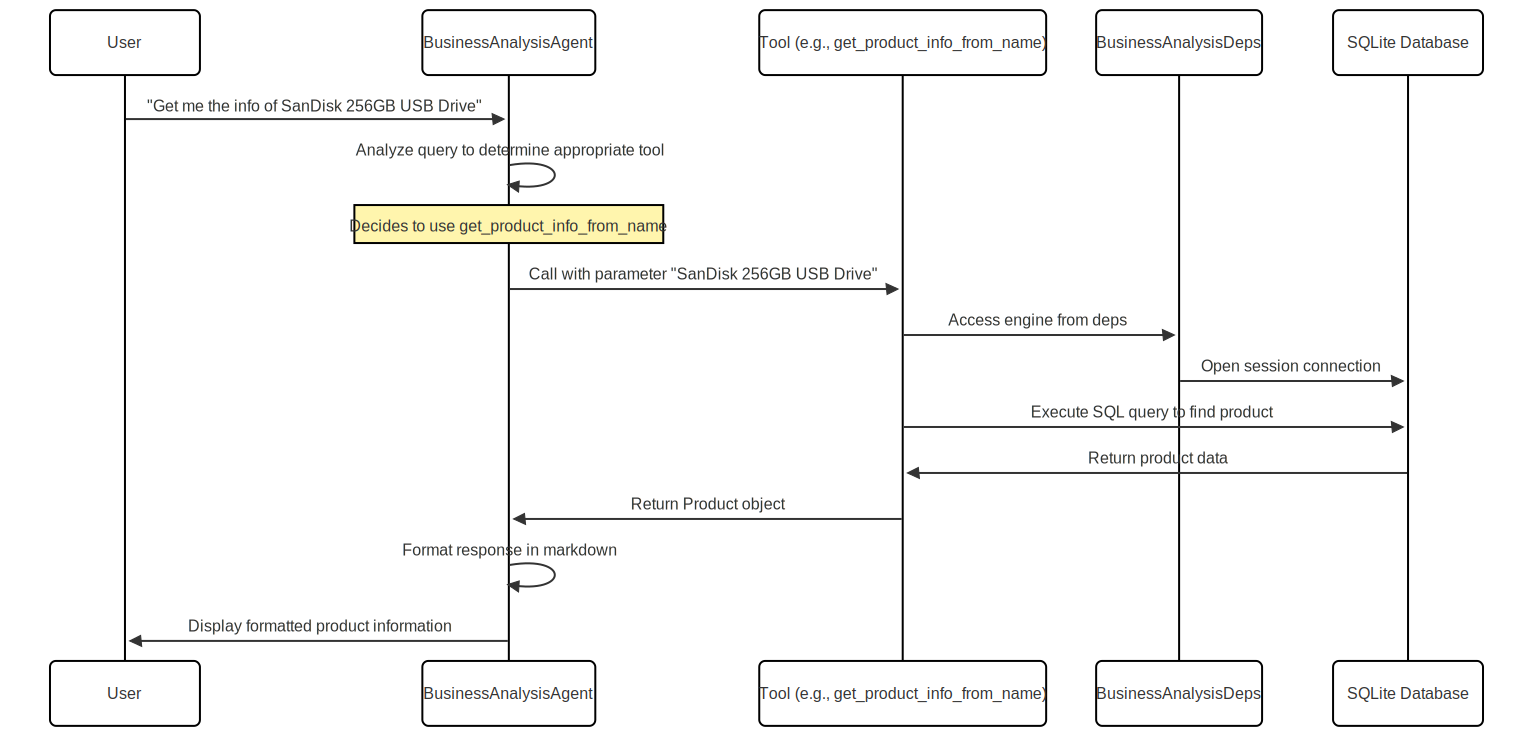

In [ ]:
display(SVG(filename='pictures/agent-single-tool-interaction.svg'))